In [39]:
import pandas as pd

In [40]:
import numpy as np

In [41]:
import matplotlib.pyplot as plt

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import pandas as pd

In [44]:
import numpy as np

In [45]:
### Import data into Python environment
comcast = pd.read_csv('C:\\Python\\Projects\\1568699544_comcast_telecom_complaints_data\\comcast_telecom_complaints_data.csv')

In [46]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [47]:
comcast[comcast.isnull()].count()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [48]:
comcast.describe(include='all')

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,250635,Comcast,24-06-15,24-Jun-15,12:41:14 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [49]:
# EDA and Cleanup the data set
comcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [50]:
import datetime
comcast.Date = pd.to_datetime(comcast.Date, format='%d-%m-%y')

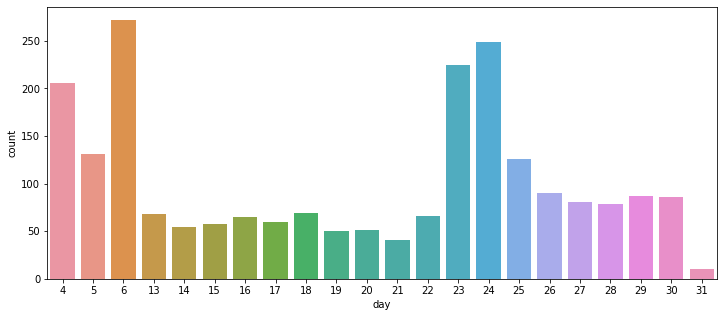

In [51]:
### Provide the trend chart for the number of complaints at monthly and daily granularity levels.
comcast['day'] = comcast['Date'].dt.day
plt.figure(figsize=(12,5))
sns.countplot(x="day", data=comcast);    # trend at daily granularity levels
# Maximum complaints are recieved on 6th day of month.

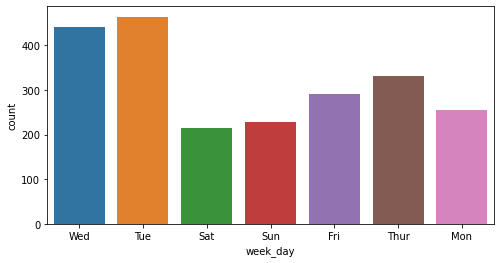

In [52]:
month = comcast['Date'].dt.month.astype(str)
year = comcast['Date'].dt.year.astype(str)
comcast['month_year']= month.str.cat(year, sep="-")
week_day = comcast['Date'].dt.dayofweek
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
comcast['week_day']= week_day.map(dmap)
plt.figure(figsize=(8,4))
sns.countplot(x="week_day", data=comcast);     # trend at week day granularity levels
# Maximum complaints are recieved on Tuesday and Wednesday

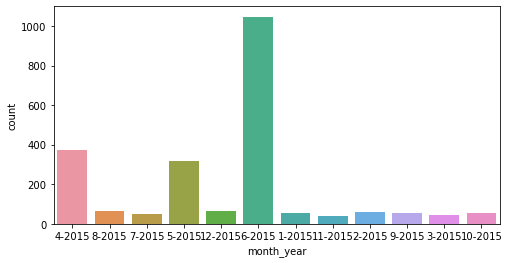

In [53]:
plt.figure(figsize=(8,4))
sns.countplot(x="month_year", data=comcast);     # trend at monthly granularity levels
# Maximum complaints are in June-2015 month

In [57]:
### Provide a table with the frequency of complaint types.
comcast['Customer Complaint'].str.lower().value_counts()

comcast                                                            102
comcast data cap                                                    30
comcast internet                                                    29
comcast data caps                                                   21
comcast billing                                                     18
                                                                  ... 
monthly data caps                                                    1
comcast/xfinity poor service, fraudulent billing and collection      1
lost emails/billing                                                  1
improper billing and non resolution of issues                        1
comcast, ypsilanti mi internet speed                                 1
Name: Customer Complaint, Length: 1740, dtype: int64

In [61]:
### Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
comcast['Status_Update'] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in comcast["Status"]]
comcast['Status_Update'].unique()

array(['Closed', 'Open'], dtype=object)

In [62]:
"""
Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
 - Which state has the maximum complaints
 - Which state has the highest percentage of unresolved complaints
"""
comcast['State'] = comcast['State'].str.title() 
state_compl = comcast.groupby(['State','Status_Update']).size().unstack().fillna(0)
state_compl

Status_Update,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,15.0,2.0
Florida,201.0,39.0


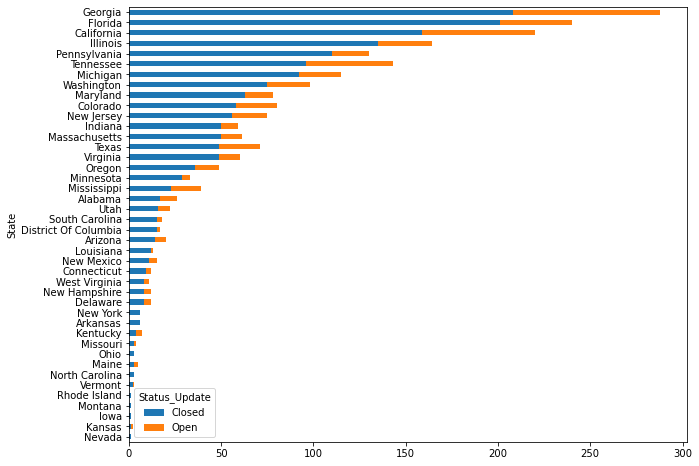

In [63]:
state_compl.sort_values('Closed',axis = 0,ascending=True).plot(kind="barh", figsize=(10,8), stacked=True);

In [64]:
state_compl['Total'] = state_compl['Open'] + state_compl['Closed']
state_compl.sort_values("Total", axis = 0, ascending = False)[:1]
# Georgia has highest complaints - 288

Status_Update,Closed,Open,Total
State,,,
Georgia,208.0,80.0,288.0


In [65]:
state_compl['Perc_Unres'] = state_compl['Open']/ state_compl['Open'].sum()*100
state_compl.sort_values("Perc_Unres", axis = 0, ascending = False)[:1]
# Georgia state has highest Unresolved complaints compared to other states which is around 15.47%

Status_Update,Closed,Open,Total,Perc_Unres
State,,,,
Georgia,208.0,80.0,288.0,15.473888


In [66]:
# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls
compl_res = comcast.groupby(['Received Via','Status_Update']).size().unstack().fillna(0)
compl_res['resolved'] = compl_res['Closed']/compl_res['Closed'].sum()*100
compl_res['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64